# EDA MetroPT3 Project 

In [43]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [70]:
df=pd.read_csv('labelled_df.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timestamp        1516948 non-null  object 
 1   TP2              1516948 non-null  float64
 2   TP3              1516948 non-null  float64
 3   H1               1516948 non-null  float64
 4   DV_pressure      1516948 non-null  float64
 5   Reservoirs       1516948 non-null  float64
 6   Oil_temperature  1516948 non-null  float64
 7   Motor_current    1516948 non-null  float64
 8   COMP             1516948 non-null  float64
 9   DV_eletric       1516948 non-null  float64
 10  Towers           1516948 non-null  float64
 11  MPG              1516948 non-null  float64
 12  LPS              1516948 non-null  float64
 13  Pressure_switch  1516948 non-null  float64
 14  Oil_level        1516948 non-null  float64
 15  Caudal_impulses  1516948 non-null  float64
 16  Airleak          1

In [72]:
df.drop('timestamp',axis=1,inplace=True)

In [73]:
df.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Airleak
0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [74]:
df.shape

(1516948, 16)

In [75]:
df.duplicated().sum()

57473

In [76]:
df.drop_duplicates(inplace=True)

In [81]:
df.shape

(1459475, 16)

In [77]:
df.columns

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'Airleak'],
      dtype='object')

In [78]:
#no missing values
np.sum(df.isna())

TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
Airleak            0
dtype: int64

**Features starting from COMP onwards are binary**

In [79]:
print("\nUnique value count:")
print(df.nunique())


Unique value count:
TP2                5257
TP3                3683
H1                 2665
DV_pressure        2257
Reservoirs         3682
Oil_temperature    2462
Motor_current      1809
COMP                  2
DV_eletric            2
Towers                2
MPG                   2
LPS                   2
Pressure_switch       2
Oil_level             2
Caudal_impulses       2
Airleak               2
dtype: int64


In [82]:
def display_value_counts(data):
    # Iterate over each column in the dataset
    for column in data.columns:
        # Get the value counts of the column
        value_counts = data[column].value_counts()
        
        # Print the value counts
        print(f"Value counts of {column}:")
        print(value_counts)
        print()  # Add a blank line for separation

In [83]:
display_value_counts(df.iloc[:,1:])

Value counts of TP3:
8.176    1862
8.166    1834
8.168    1786
8.180    1782
8.178    1767
         ... 
6.088       1
6.266       1
3.512       1
3.322       1
4.916       1
Name: TP3, Length: 3683, dtype: int64

Value counts of H1:
-0.012    41650
-0.010    38461
-0.008    30278
-0.014    25719
-0.006    18208
          ...  
 7.208        1
 4.832        1
 0.714        1
 1.658        1
 5.378        1
Name: H1, Length: 2665, dtype: int64

Value counts of DV_pressure:
-0.020    320207
-0.022    319820
-0.018    216747
-0.024    211892
-0.016    152264
           ...  
 3.202         1
 3.248         1
 4.394         1
 4.364         1
 6.100         1
Name: DV_pressure, Length: 2257, dtype: int64

Value counts of Reservoirs:
8.168    1863
8.176    1854
8.166    1815
8.186    1790
8.188    1784
         ... 
5.218       1
5.148       1
5.532       1
4.020       1
5.000       1
Name: Reservoirs, Length: 3682, dtype: int64

Value counts of Oil_temperature:
66.850    4067
61.975    404

In [64]:
df.iloc[:,:15]

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


### Time Series Line Plots 

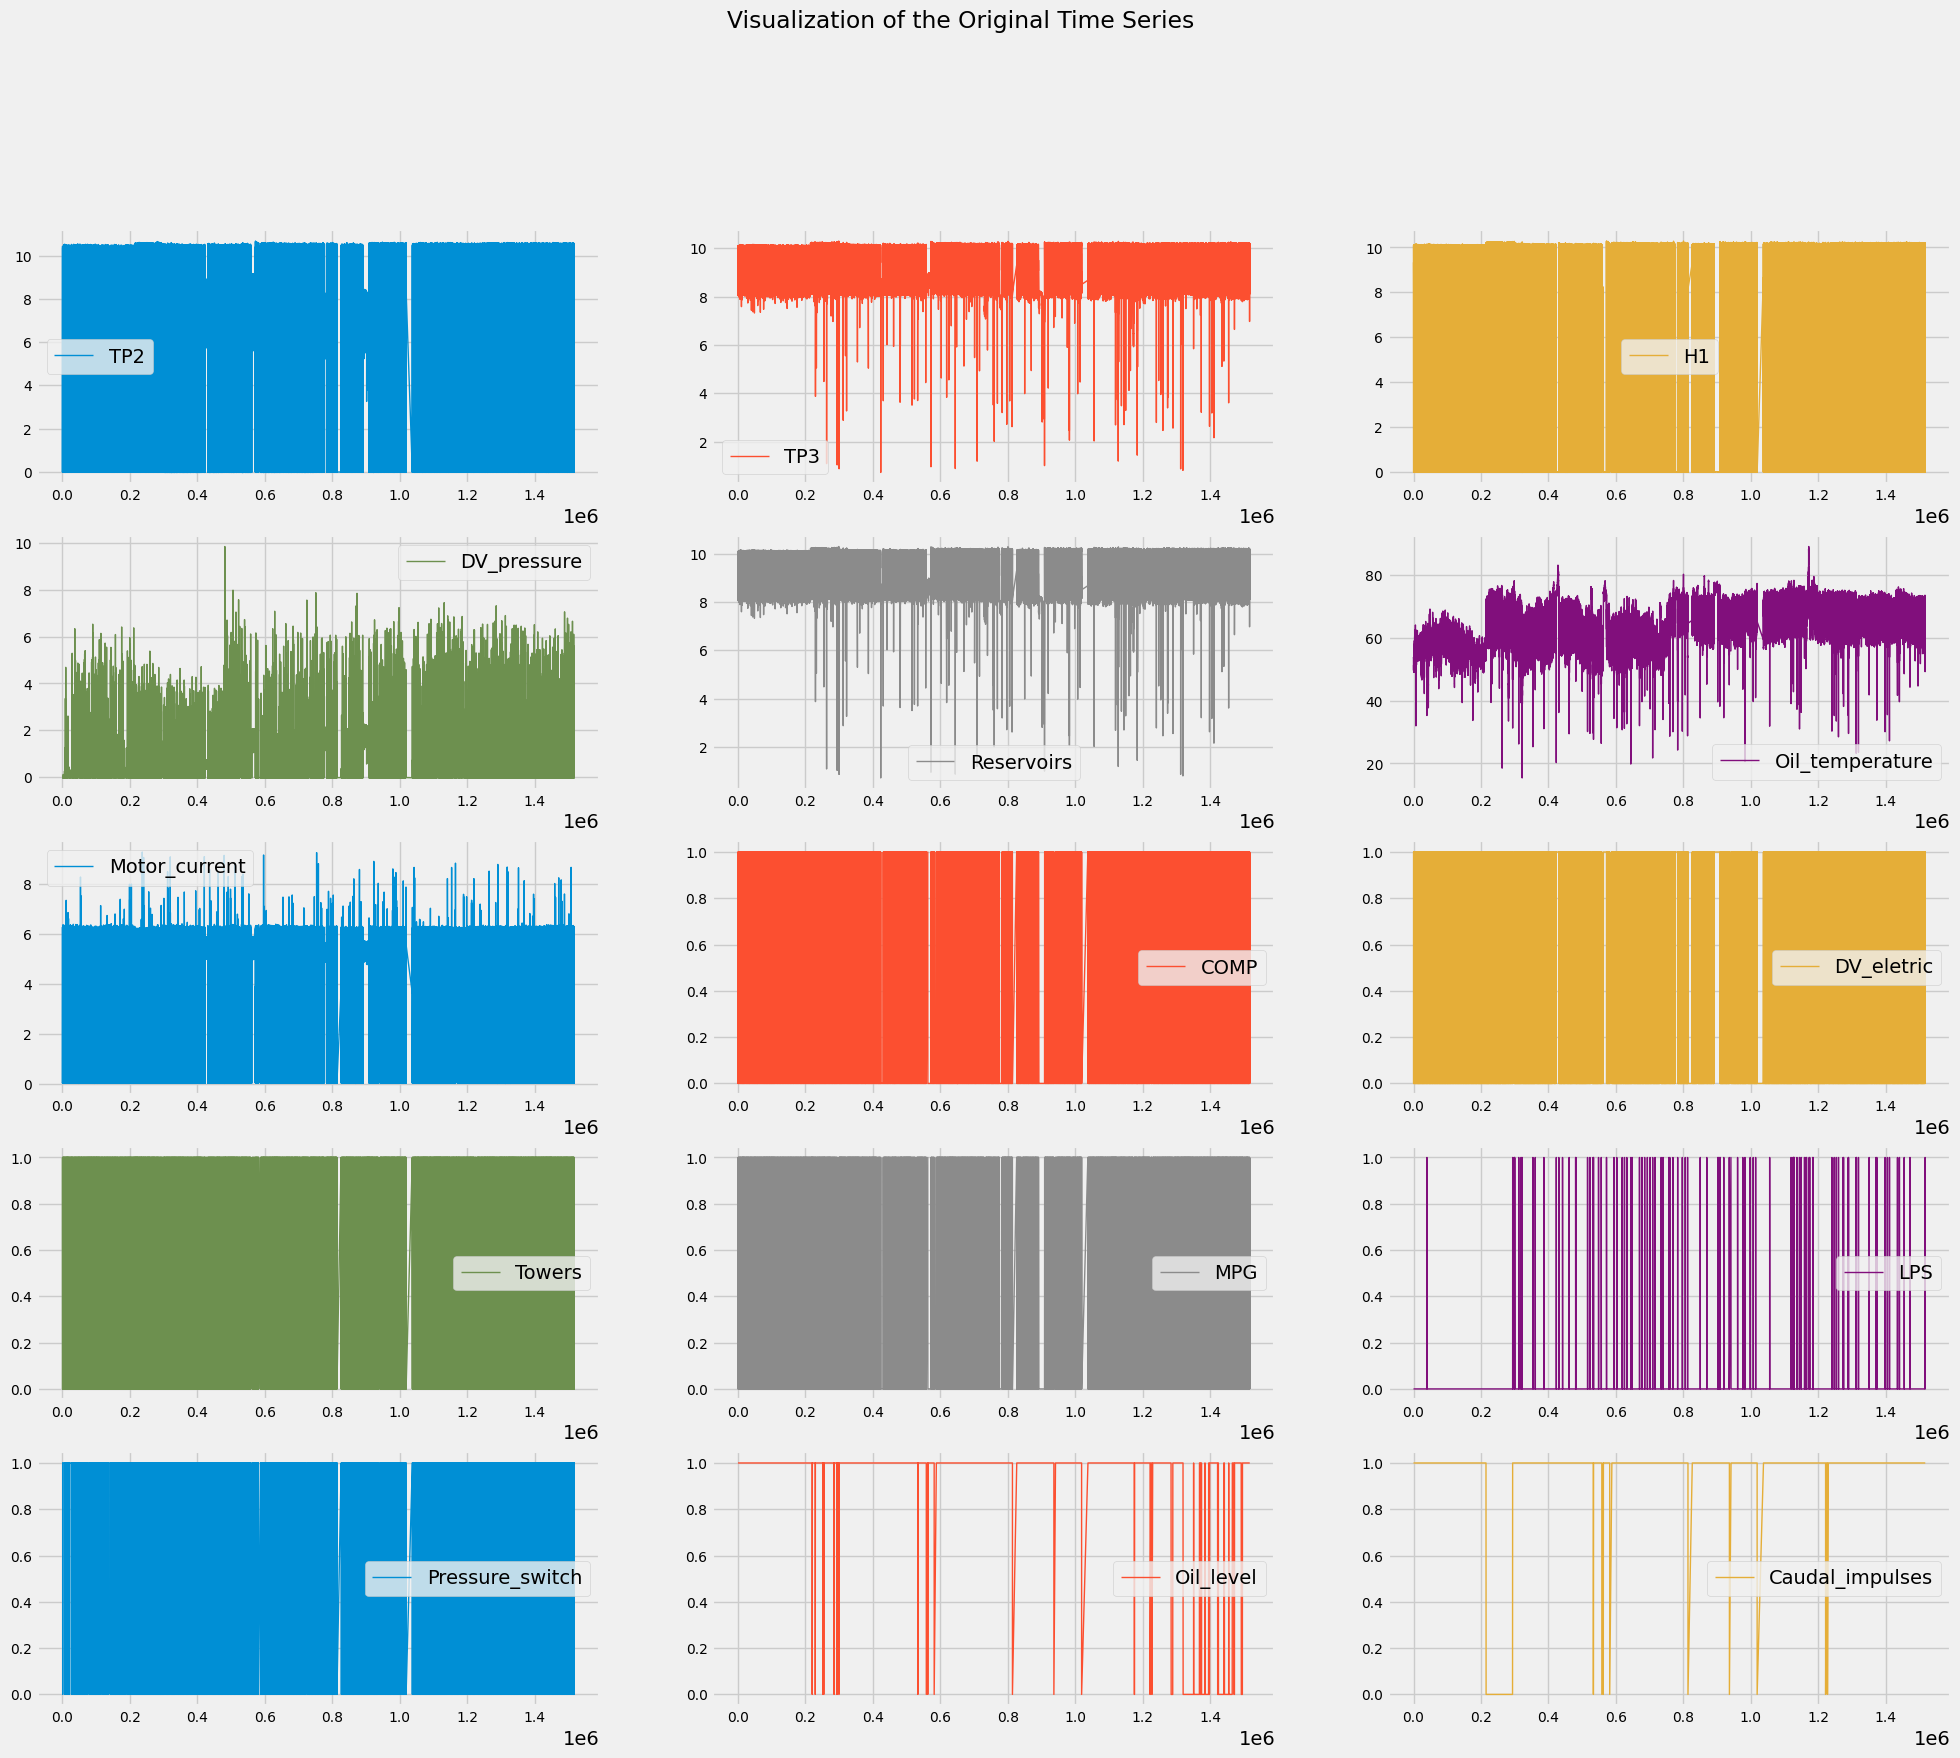

In [84]:
# Plot the time series
plt.style.use('fivethirtyeight')
df.iloc[:,:15].plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=1,
        sharex=False,
        title='Visualization of the Original Time Series')
plt.show()

### Probability Distributions

In [85]:
def plot_column_distributions(data):
    # Set the seaborn style to 'fivethirtyeight'
    plt.style.use('fivethirtyeight')

    # Calculate the number of rows and columns for the grid
    num_cols = len(data.columns)
    num_rows = (num_cols - 1) // 3 + 1

    # Create the subplots grid
    fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

    # Flatten the axes array
    axs = axs.flatten()

    # Iterate over each column in the dataset
    for i, column in enumerate(data.columns):
        # Create a histogram of the column values
        sns.histplot(data[column], kde=True, bins=30, ax=axs[i])
        
        # Set plot title and labels
        axs[i].set_title(f"Distribution of {column}")
        axs[i].set_xlabel("Value")
        axs[i].set_ylabel("Frequency")

    # Remove any unused subplots
    if len(data.columns) < len(axs):
        for j in range(len(data.columns), len(axs)):
            fig.delaxes(axs[j])

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Display the plot
    plt.show()

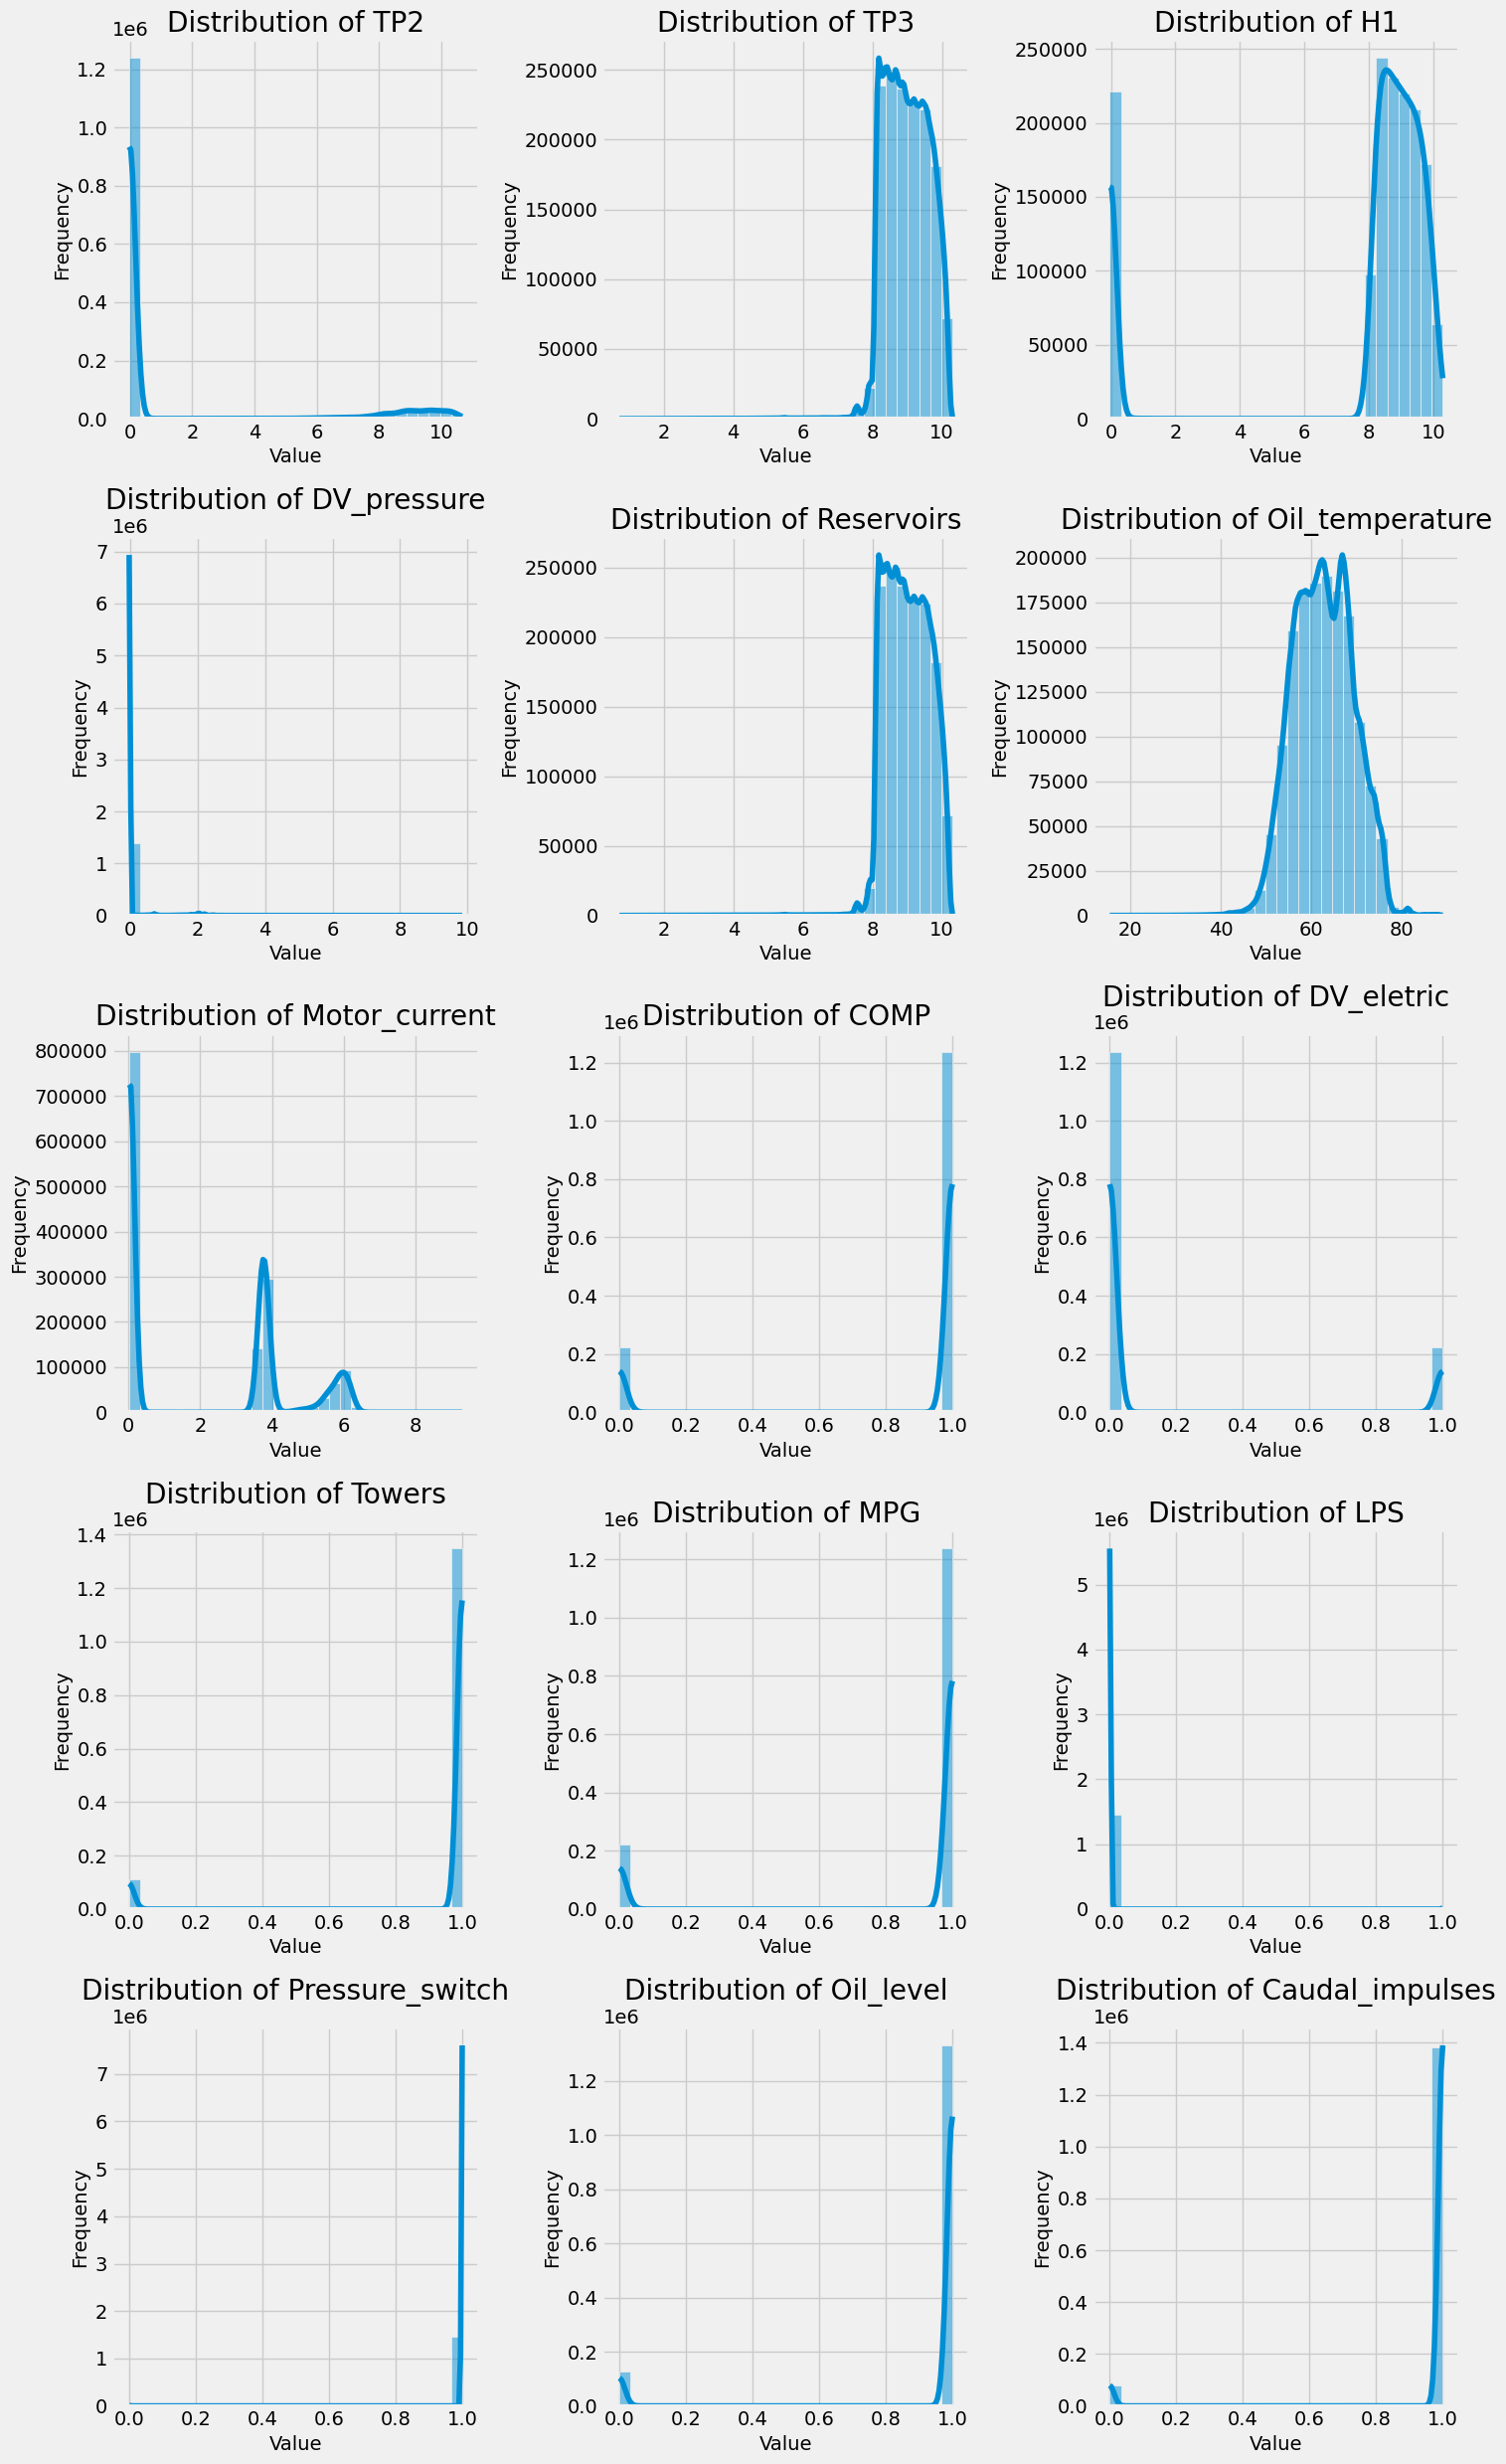

In [86]:
plot_column_distributions(df.iloc[:,:15])

### Correlation Matrix

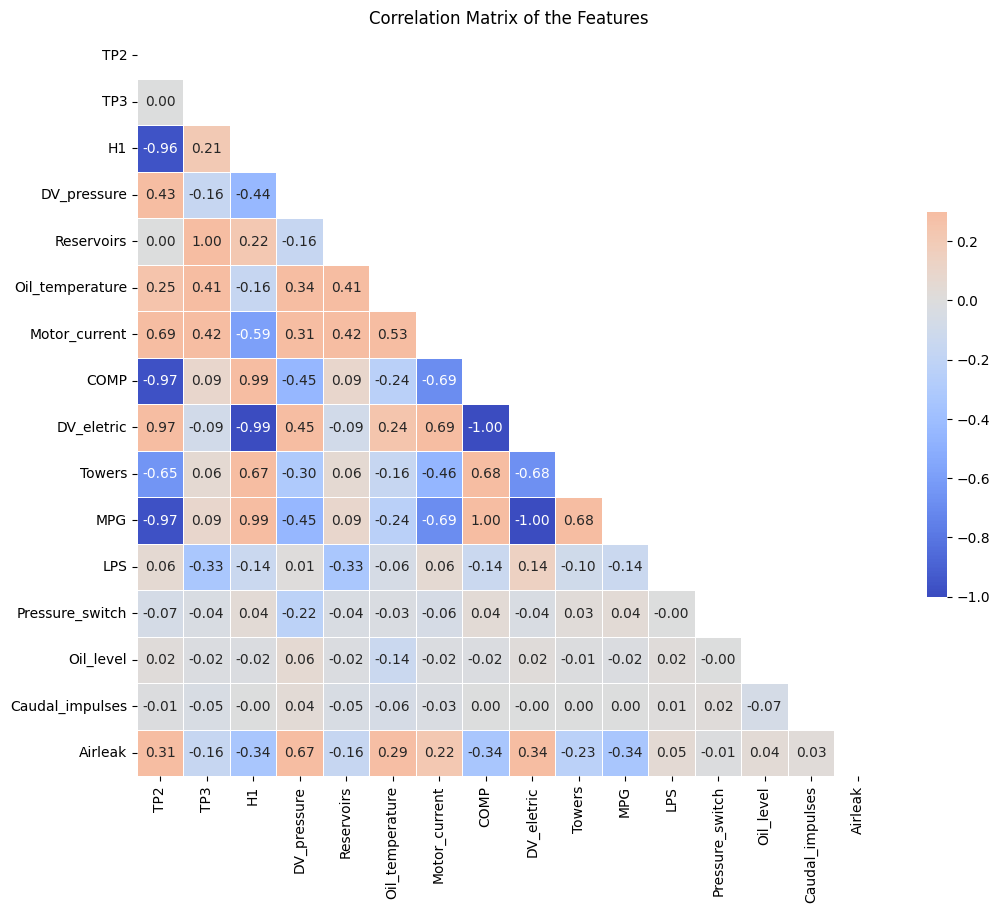

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr().round(2)

# Set the figure size
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix of the Features')
plt.show()